## Load Packages


In [40]:
install.packages("simputation") ## for imputed data
library(simputation)            ## for dealing with missing values
library(naniar)
library(ggplot2)


Installing package into 'C:/Users/Samar/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'simputation' is in use and will not be installed"

Let's see summary and structure of the oceanbuoys data set in naniar library

In [7]:
str(oceanbuoys)

Classes 'tbl_df', 'tbl' and 'data.frame':	736 obs. of  8 variables:
 $ year      : num  1997 1997 1997 1997 1997 ...
 $ latitude  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ longitude : num  -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 ...
 $ sea_temp_c: num  27.6 27.5 27.6 27.6 27.6 ...
 $ air_temp_c: num  27.1 27 27 26.9 26.8 ...
 $ humidity  : num  79.6 75.8 76.5 76.2 76.4 ...
 $ wind_ew   : num  -6.4 -5.3 -5.1 -4.9 -3.5 ...
 $ wind_ns   : num  5.4 5.3 4.5 2.5 4.1 ...


In [5]:
summary(oceanbuoys)

      year         latitude        longitude        sea_temp_c   
 Min.   :1993   Min.   :-5.000   Min.   :-110.0   Min.   :21.60  
 1st Qu.:1993   1st Qu.:-2.000   1st Qu.:-110.0   1st Qu.:23.50  
 Median :1995   Median :-1.000   Median :-102.5   Median :26.55  
 Mean   :1995   Mean   :-1.375   Mean   :-102.5   Mean   :25.86  
 3rd Qu.:1997   3rd Qu.: 0.000   3rd Qu.: -95.0   3rd Qu.:28.21  
 Max.   :1997   Max.   : 0.000   Max.   : -95.0   Max.   :30.17  
                                                  NA's   :3      
   air_temp_c       humidity        wind_ew          wind_ns      
 Min.   :21.42   Min.   :71.60   Min.   :-8.100   Min.   :-6.200  
 1st Qu.:23.26   1st Qu.:81.30   1st Qu.:-5.100   1st Qu.: 1.500  
 Median :24.52   Median :85.20   Median :-3.900   Median : 2.900  
 Mean   :25.03   Mean   :84.43   Mean   :-3.716   Mean   : 2.636  
 3rd Qu.:27.08   3rd Qu.:88.10   3rd Qu.:-2.600   3rd Qu.: 4.100  
 Max.   :28.50   Max.   :94.80   Max.   : 4.300   Max.   : 7.300  
 NA

In [4]:
head(oceanbuoys)


year,latitude,longitude,sea_temp_c,air_temp_c,humidity,wind_ew,wind_ns
1997,0,-110,27.59,27.15,79.6,-6.4,5.4
1997,0,-110,27.55,27.02,75.8,-5.3,5.3
1997,0,-110,27.57,27.00,76.5,-5.1,4.5
1997,0,-110,27.62,26.93,76.2,-4.9,2.5
1997,0,-110,27.65,26.84,76.4,-3.5,4.1
1997,0,-110,27.83,26.94,76.7,-4.4,1.6


In [10]:
names(oceanbuoys)

[1] "year"       "latitude"   "longitude"  "sea_temp_c" "air_temp_c"
[6] "humidity"   "wind_ew"    "wind_ns"

Now we will find number of missing data and visulaize them

In [8]:
n_miss(oceanbuoys)

[1] 177

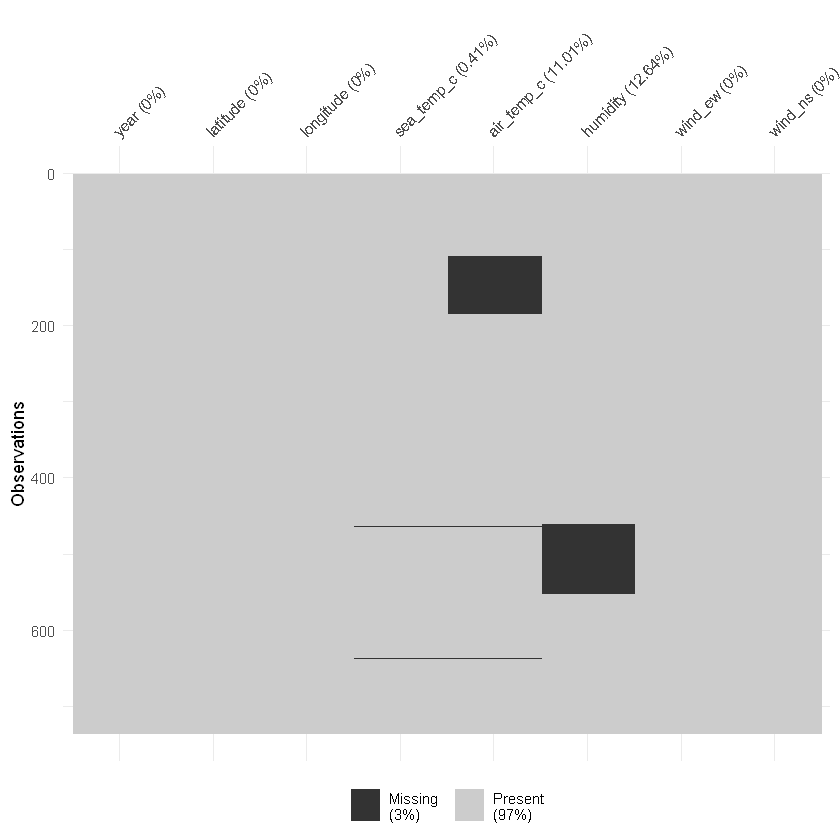

In [9]:
vis_miss(oceanbuoys)

It's clear from the figure that the bulk of missing values are in two varibles: air_temp_c and humidity

### Tracking missing values

We will usedifferent methods to impute the data and we will evalue each method

#### Method one: Impute Below All method

Impute below: which impute values below the range of the values of data

In [13]:
ocean_below_method <- bind_shadow(oceanbuoys) %>% 
impute_below_all()%>%
  add_label_shadow()

Visualize the imputed values

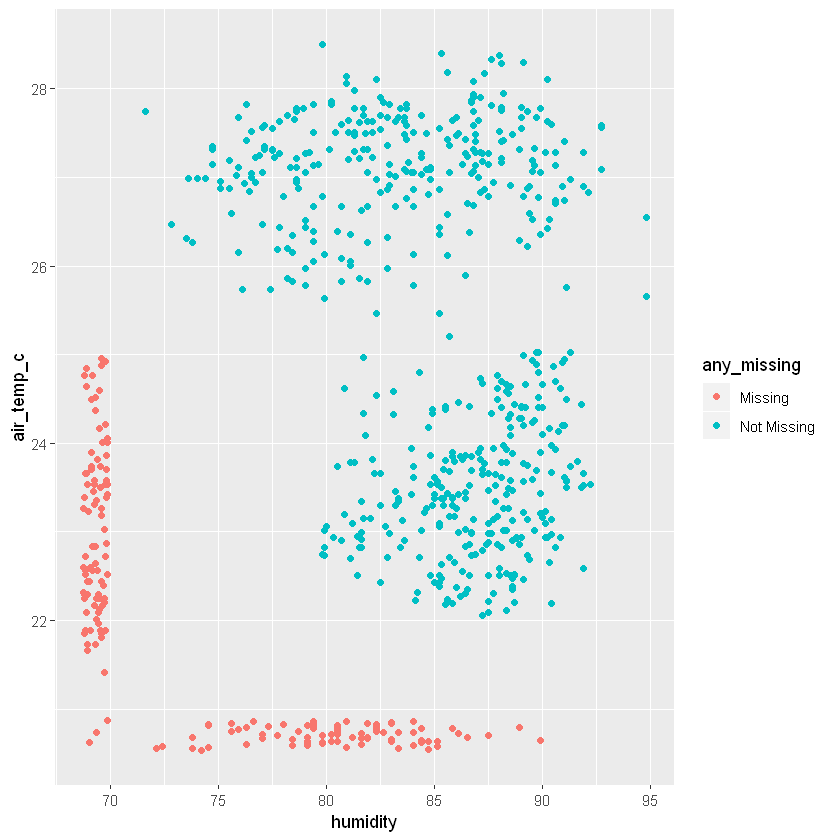

In [16]:
ggplot(ocean_below_method,
       aes(x = humidity, y = air_temp_c, color = any_missing)) + 
  geom_point()

We can see from the plot that missing values is far from the real values

Let’s see how it is the difference between the real and missing values of the varible air_temp_c

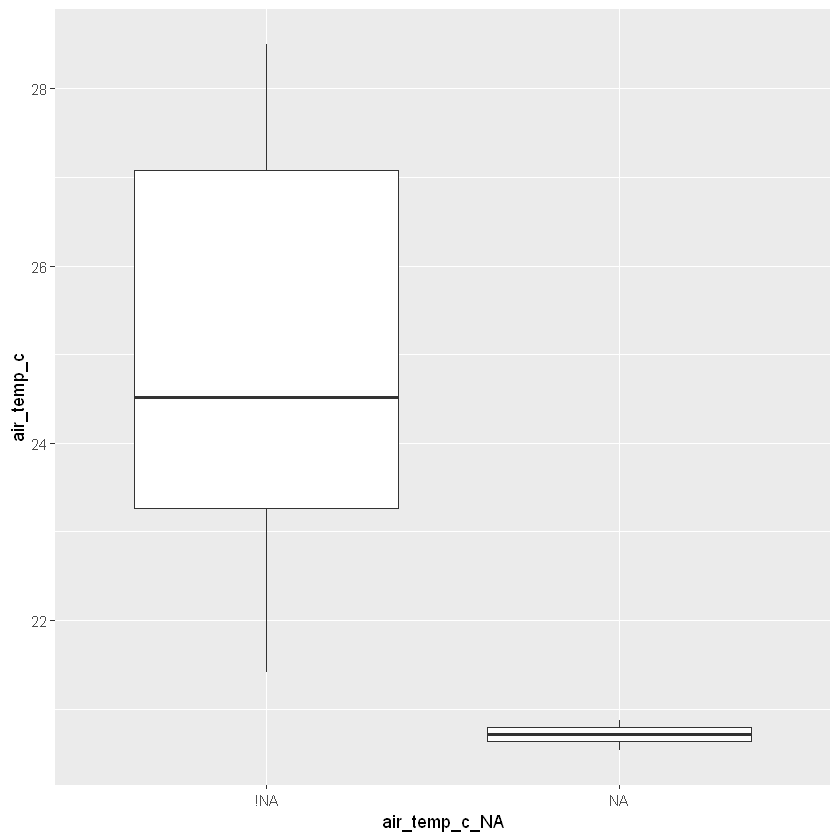

In [17]:
ggplot(ocean_below_method, 
       aes(x = air_temp_c_NA, y = air_temp_c)) + 
  geom_boxplot()

#### Mehod 2: mean values

In [18]:
ocean_mean_method <- bind_shadow(oceanbuoys) %>% 
  impute_mean_all() %>% 
  add_label_shadow()

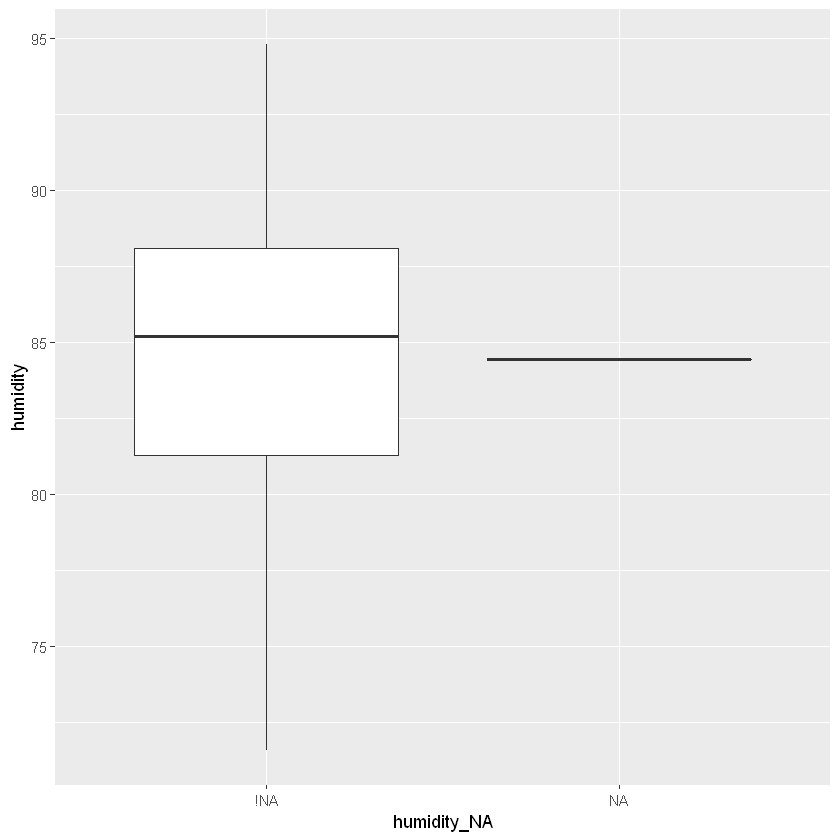

In [19]:
ggplot(ocean_mean_method, 
       aes(x = humidity_NA, y = humidity)) + 
  geom_boxplot()

#### Method three: Linear Regression Imputation

In [39]:
ocean_linear_regression_method <- oceanbuoys %>% 
    bind_shadow() %>%
    impute_lm(air_temp_c ~ wind_ew + wind_ns) %>% 
    impute_lm(humidity ~ wind_ew + wind_ns) %>%
    add_label_shadow()


Evaluate the method by plotting the imputed data

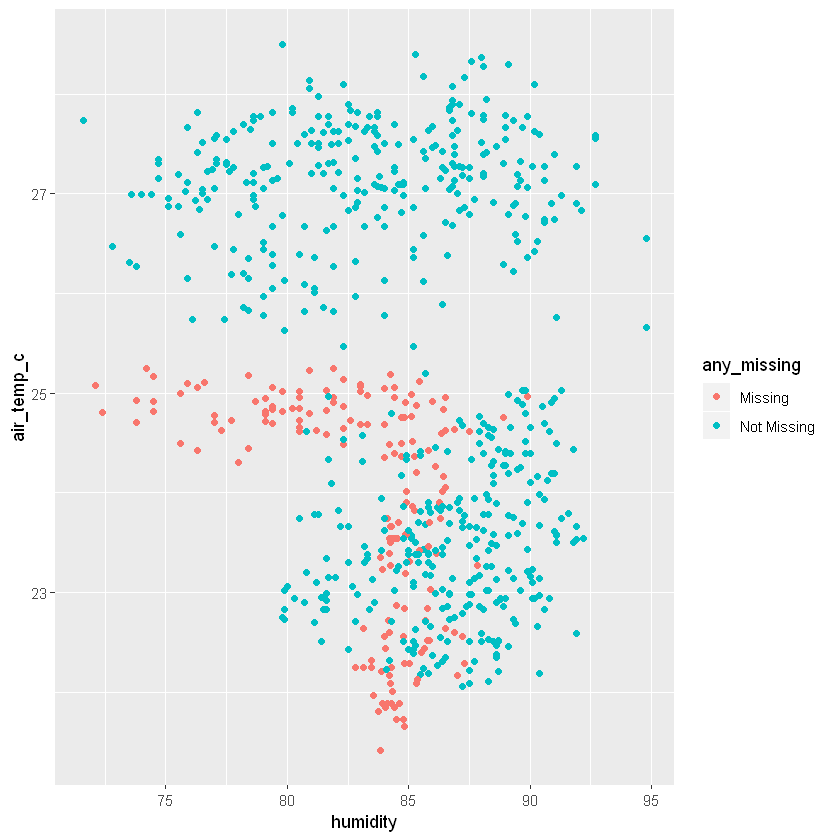

In [29]:
ggplot(ocean_linear_regression_method,
       aes(x = humidity, y = air_temp_c, color = any_missing)) + 
  geom_point()

We can see the difference between this method and pervious method. Here the imputed values are close to real values

In this code we deal with missing values using various traditional methods, and we evaluate each value to see if the imputation is good or bad.